In [26]:
from scipy.integrate import odeint
import numpy as np
import matplotlib.pyplot as plt

In [27]:
def x_prime(v,b): #pochodna x
    dxdb= v*np.cos(b)
    return dxdb
    
def y_prime(v,b): #pierwsza pochodna y
    dydb= v*np.sin(b)
    return dydb

In [52]:
x_prime(2,2)

-0.8322936730942848

In [36]:
def x_bis(v,b,k1,k2,omega0,t,tał): #2pochodna x
    k=(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    w=k*v**2
    omega=omega0(1-np.exp(-t/tał))
    
    ddx=-(1/m)*w*np.cos(omega+b)
    return ddx

In [37]:
def y_bis(v,b,k1,k2,omega0,t,tał): #2pochodna y
    g=9.81
    k=(k2-k1)/(np.cos(omega0))*(-y_prime(v,b)/v)
    w=k*v**2
    omega=omega0(1-np.exp(-t/tał))
    
    ddy=(1/m)*w*np.sin(omega+b)- m*g
    return ddy

In [31]:
def x_prime2(v,b): #pochodna x
    dxdb= lambda y,t: v*np.cos(b) #działa ale to t tak z dupy
    return dxdb
    
def y_prime2(v,b): #pierwsza pochodna y
    dydb= lambda y,t: v*np.sin(b)
    return dydb

In [53]:
x_prime2(2,2)

<function __main__.x_prime2.<locals>.<lambda>(y, t)>

In [54]:
def x_bis2(v,b,k1,k2,omega0,t,tał): #2pochodna x
    f=y_prime(v,b)
    k=(k2-k1)/(np.cos(omega0))*(-1)*(f/ v)
    w=k*v
    omega=omega0(1-np.exp(-t/tał))
    
    ddx= lambda y,t: -(1/m)*w*(x_prime2(v,b)*np.cos(omega)+y_prime2(v,b)*np.sin(omega))
    return ddx

def y_bis2(v,b,k1,k2,omega0,t,tał): #2pochodna y
    g=9.81
    k=(k2-k1)/(np.cos(omega0))*(-1)*(y_prime2(v,b)/v)
    w=k*v**2
    omega=omega0(1-np.exp(-t/tał))
    
    ddy=(1/m)*w*np.sin(omega+b)- m*g
    return ddy

In [55]:
def odeEuler(f,y0,t):
    """
    approximate the solution of y'=f(y,t) by Euler's method
    """
    y=np.zeros(len(t))
    y[0]=y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*(t[n+1] - t[n])
    return y

In [56]:
def ode2Euler(time,amount,v,b,u0,k1,k2,omega0,tał): #czas, ile próbek czasu, prędkość, kąt nachylenia v do poziomu, war początkowy
    t=np.linspace(0,time,amount)
    f=x_prime2(v,b)
    u=odeEuler(f,0,t)
    
    f2=x_bis2(v,b,k1,k2,omega0,t,tał)
    uu=odeEuler(f2,0,t)
    
    return uu
    

In [57]:
time=3
amount= 25
v=26.5
b=0
u0=0
k1=1
k2=2
omega0=60
tał=1
ode2Euler(time,amount,v,b,u0,k1,k2,omega0,tał)

TypeError: 'int' object is not callable

wykres dla pierwszej pochdnej x

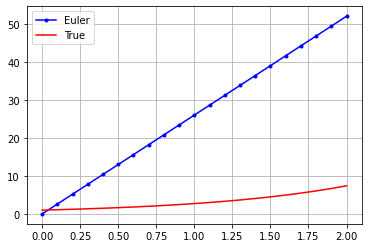

In [33]:
t = np.linspace(0,2,21)
y0 = 0
v=26.5
b=0
f = x_prime2(26,0)
#f = lambda y,t: y
y = odeEuler(f,y0,t)
y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-',t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()

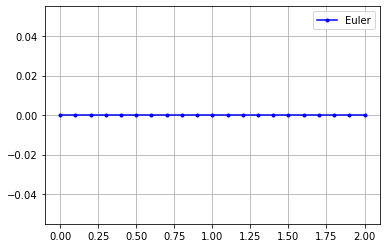

In [35]:
t = np.linspace(0,2,21)
y0 = 0
v=26.5
b=0
f = y_prime2(26,0)
#f = lambda y,t: y
y = odeEuler(f,y0,t)
#y_true = np.exp(t) #nieistotne jakby co
plt.plot(t,y,'b.-')#,t,y_true,'r-')
plt.legend(['Euler','True'])
#plt.axis([0,2,0,9])
plt.grid(True)
#plt.title("Solution of $y'=y , y(0)=0$")
plt.show()